In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (10,8)
plt.style.use('seaborn-darkgrid')

In [2]:
home = pd.read_csv('data/home_page_table.csv')
conf = pd.read_csv('data/payment_confirmation_table.csv')
pay = pd.read_csv('data/payment_page_table.csv')
search = pd.read_csv('data/search_page_table.csv')
user = pd.read_csv('data/user_table.csv')

user['date'] = pd.to_datetime(user['date']) # 2015.01~2015.04
user = user.sort_values('date')

# table 하나로 통합
user = user.merge(home, on='user_id', how='left').rename(columns={'page':'home'})
user = user.merge(search, on='user_id', how='left').rename(columns={'page':'search'})
user = user.merge(pay, on='user_id', how='left').rename(columns={'page':'pay'})
user = user.merge(conf, on='user_id', how='left').rename(columns={'page':'conf'})

# 정리
user = user.fillna(0)
user.iloc[:,-4:] = (user.iloc[:,-4:] !=0) *1

In [246]:
data = dict(
    number=[len(home), len(search), len(pay), len(conf)],
    colors = ['rgb(0, 102, 204)', 'rgb(51, 153, 255)', 'rgb(0, 102, 204)', 'rgb(204, 255, 255)'],
    stage=["home page", "search page", "pay page", "confirm page"])
        
fig = px.funnel(data, x='number', y='stage')
fig.show()

## plot

([], <a list of 0 Text xticklabel objects>)

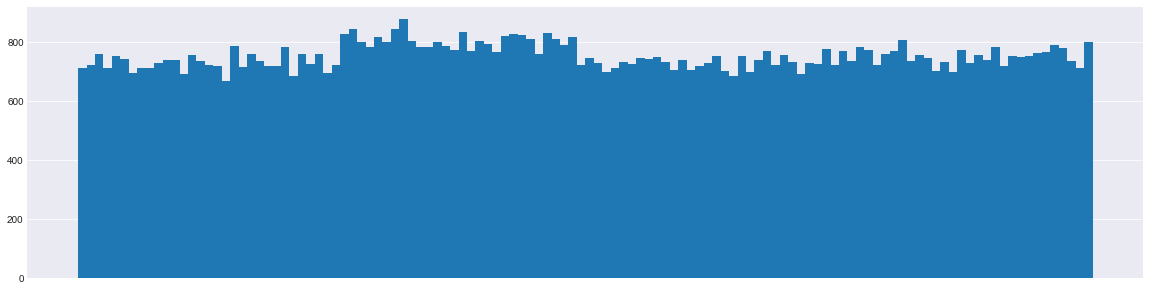

In [51]:
user['date'].hist(bins=120, figsize=(20,5))
plt.xticks([])


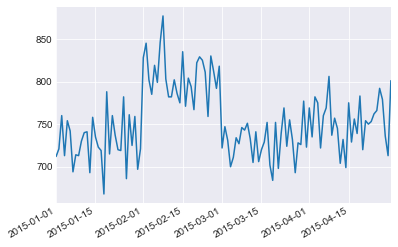

In [60]:
user['date'].value_counts().plot()

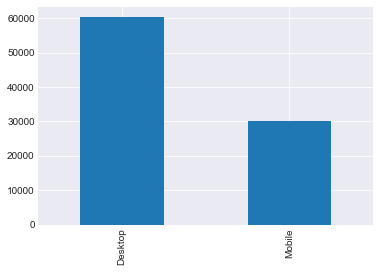

In [63]:
user['device'].value_counts().plot.bar()

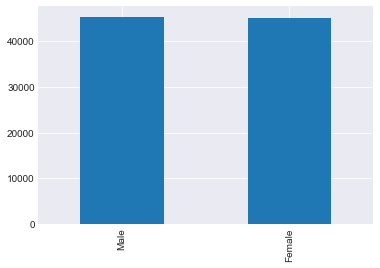

In [64]:
user['sex'].value_counts().plot.bar()

## analysis
* 다음단계에서 얼마나 줄어드는지
* 현단계에서 최종 결제확정까지는 얼마나 줄어드는지
* 서로다른 조합을 어떻게 최적화할까

### 성별 단계별 전환율

In [257]:
databysex = user.groupby('sex').sum().iloc[:,1:]
conv_rate_sex = databysex.loc[:,'search':'conf']/databysex.loc[:,'home':'pay'].values # 단게별 전환율 
tconv_rate_sex = databysex.loc[:,'search':'conf'].div(databysex.home, axis=0) # 현단계 / home page

,search,pay,conf
sex,,,
Female,0.503073,0.068774,0.005347
Male,0.496944,0.064644,0.004655


### 기기별 단계별 전환율

In [260]:
databydev = user.groupby('device').sum().iloc[:,1:]
conv_rate_dev = databydev.loc[:,'search':'conf']/databysex.loc[:,'home':'pay'].values
tconv_rate_dev = databydev.loc[:,'search':'conf'].div(databydev.home, axis=0) # 현단계 / home page

In [261]:
tconv_rate_dev

,search,pay,conf
device,,,
Desktop,0.5,0.05,0.002492
Mobile,0.5,0.10,0.010000


### 월별 단계별 전환율

In [262]:
user['month'] = user['date'].dt.month
user['week'] = user['date'].dt.week
user['weekday'] = user['date'].dt.weekday

In [265]:
databymonth = user.groupby('month').sum() 
conv_ratio_month = databymonth.iloc[:,2:5]/databymonth.iloc[:,1:4].values
tconv_ratio_month = databymonth.iloc[:,2:5].div(databymonth.home, axis=0) # 현단계 / home page

### 주별 단계별 전화율

In [272]:
user

,user_id,date,device,sex,home,search,pay,conf,month,week,day,weekday
0,602817,2015-01-01,Desktop,Male,1,0,0,0,1,1,3,3
1,653429,2015-01-01,Desktop,Male,1,0,0,0,1,1,3,3
2,701366,2015-01-01,Desktop,Male,1,0,0,0,1,1,3,3
3,309933,2015-01-01,Desktop,Female,1,0,0,0,1,1,3,3
4,574869,2015-01-01,Desktop,Male,1,1,0,0,1,1,3,3
5,993501,2015-01-01,Desktop,Male,1,0,0,0,1,1,3,3
6,955015,2015-01-01,Desktop,Female,1,1,0,0,1,1,3,3
7,275388,2015-01-01,Desktop,Male,1,0,0,0,1,1,3,3
8,881745,2015-01-01,Mobile,Female,1,1,0,0,1,1,3,3
9,71618,2015-01-01,Desktop,Male,1,1,0,0,1,1,3,3


### 요일별 단계별 전환율

In [233]:
databyday = user.groupby('weekday').sum() 
conv_ratio_day = databyday.iloc[:,2:5]/databyday.iloc[:,1:4].values

In [234]:
conv_ratio_day

,search,pay,conf
weekday,,,
0,0.500425,0.134043,0.088608
1,0.492400,0.136436,0.080891
2,0.493726,0.132281,0.064439
3,0.499628,0.133840,0.073415
4,0.502431,0.135966,0.061998
5,0.511288,0.129106,0.082840
6,0.500077,0.132312,0.072515


### 조건종합

In [240]:
total = user.groupby(['sex','month','weekday']).sum()
conv_rate_matrix = total.iloc[:,2:] / total.iloc[:,1:4].values

In [243]:
conv_rate_matrix

search       pay      conf
sex    month weekday                              
Female 1     0        0.607750  0.210291  0.095745
             1        0.615229  0.178532  0.079755
             2        0.598377  0.178531  0.101266
             3        0.601387  0.171251  0.072539
             4        0.608744  0.172192  0.090909
             5        0.593275  0.178245  0.082051
             6        0.618403  0.173961  0.094340
       2     0        0.615289  0.176768  0.108571
             1        0.610083  0.216527  0.091787
             2        0.608339  0.169263  0.049080
             3        0.593455  0.193001  0.049451
             4        0.605330  0.166667  0.025157
             5        0.621279  0.166157  0.098160
             6        0.609080  0.180058  0.059140
       3     0        0.393858  0.061560  0.066667
             1        0.397948  0.077341  0.070175
             2        0.394774  0.093023  0.057692
             3        0.403631  0.077855  0.111111
             4        0.392758  0.078014  0.090909
             5        0.409122  0.065878  0.051282
             6        0.382662  0.079365  0.090909
       4     0        0.415301  0.062500  0.078947
             1        0.401460  0.076033  0.086957
             2        0.388091  0.061644  0.066667
             3        0.394981  0.062155  0.066667
             4        0.401436  0.055285  0.029412
             5        0.398915  0.061224  0.055556
             6        0.406969  0.066236  0.097561
Male   1     0        0.588117  0.177072  0.096154
             1        0.579537  0.163241  0.059259
             2        0.593964  0.170901  0.060811
             3        0.591139  0.169829  0.078212
             4        0.581564  0.189241  0.050761
             5        0.608310  0.163934  0.066667
             6        0.613333  0.173913  0.078947
       2     0        0.586675  0.181914  0.063584
             1        0.594304  0.171459  0.093168
             2        0.603234  0.169072  0.054878
             3        0.612042  0.179513  0.079096
             4        0.603820  0.178571  0.051429
             5        0.597987  0.149505  0.112583
             6        0.617735  0.170708  0.068182
       3     0        0.408591  0.052564  0.097561
             1        0.384363  0.059744  0.071429
             2        0.384668  0.089947  0.058824
             3        0.385714  0.059259  0.062500
             4        0.371294  0.078040  0.093023
             5        0.388102  0.069343  0.052632
             6        0.399566  0.063859  0.000000
       4     0        0.424361  0.081790  0.075472
             1        0.394211  0.073427  0.071429
             2        0.411491  0.071698  0.052632
             3        0.398023  0.060131  0.108696
             4        0.403279  0.052033  0.156250
             5        0.408769  0.067823  0.069767
             6        0.379730  0.069395  0.076923

### 4.업데이트 되는상황
* 신규 데이터만 넣는 방식
* 인풋된 데이터는 자동저장.

In [302]:
class tester:
    """
    d
    """
    def __init__(self, df, cate):
        
        self.data = df
        
        self.cate_list = cate
        self.n_cate = len(cate)
        self.step_list = list(set(df.columns) - set(self.cate_list))
        self.n_step = df.shape[1] - self.n_cate
        
        
    
        temp = self.step_list # 개별 step 이름
        temp_total = [df[i].sum() for i in temp] # 개별 step 개수 
        self.step_order = []        
        self.step_total = []
        
        for i in range(self.n_step):
            self.step_order.append(temp[np.argmax(temp_total)])
            self.step_total.append(np.max(temp_total))
            temp.pop(np.argmax(temp_total))
            temp_total.pop(np.argmax(temp_total))
        
              
    def abtest(self,cate, target=True):
        """
        input : 
        output : 단계별 전환율/단계별~target전환율
        """
        
        temp = self.data.groupby(cate).sum()[self.step_list]
        group = self.data.groupby(cate).sum()[self.step_list].index
        for i in range(len(group)):
            print(f'group "{group[i]}" : {temp.values[i]}')
            
        if target == True:
            conv_ratio = temp.div(temp.iloc[:,0], axis=0)
        else :
            conv_ratio = temp.iloc[:,1:].div(temp.iloc[:,:-1], axis=0)
        
        print(conv_ratio)
        
        
    

In [298]:
conv_rate_dev = databydev.loc[:,'search':'conf']/databysex.loc[:,'home':'pay'].values
tconv_ratio_month = databymonth.iloc[:,2:5].div(databymonth.home, axis=0) # 현단계 / home page

In [306]:
t = tester(user[['home','search','pay','conf','sex']],'sex')

TypeError: cannot perform reduce with flexible type

In [307]:
np.max([1,2,3,4,5])

5